In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/per

In [3]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Class weight calculation
from sklearn.utils.class_weight import compute_class_weight

# Keras library 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Corrected import
from keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from keras import regularizers
from keras.callbacks import ReduceLROnPlateau

# Different CNN Models
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3, MobileNetV2, DenseNet121

# To chain two different data augmented images for training
from itertools import chain

# Distributed Computing
import tensorflow as tf


In [4]:
BATCH_SIZE = 48

image_height = 299
image_width = 299

In [5]:
# Data agumentation and pre-processing using tensorflow
data_generator_1 = ImageDataGenerator(
                            rescale=1./255,
                            rotation_range=5,
                            width_shift_range=0.05,
                            height_shift_range=0.05,
                            shear_range=0.05,
                            zoom_range=0.05,
                            brightness_range = [0.95,1.05],
                            horizontal_flip=False,
                            vertical_flip=False,
                            fill_mode='nearest'                                   
                        )

print('Data Augmentation 1 was created')

data_generator_2 = ImageDataGenerator(
                            rescale=1./255,
                            rotation_range=10,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            shear_range=0.1,
                            zoom_range=0.1,
                            brightness_range = [0.9,1.1],
                            horizontal_flip=False,
                            vertical_flip=False,
                            fill_mode='nearest'                                   
                        )
print('Data Augmentation 2 was created')

data_generator_3 = ImageDataGenerator (rescale=1./255)

Data Augmentation 1 was created
Data Augmentation 2 was created


In [6]:
train_generator1 = data_generator_1.flow_from_directory(
    directory = "/kaggle/input/chest-xray-pneumonia/chest_xray/train", # images data path / folder in which images are there
    color_mode = "rgb",
    target_size = (image_height, image_width), # image height , image width
    class_mode = "categorical",
    batch_size = BATCH_SIZE,
    shuffle = True,
    seed = 42)

print('Data Augmentation 1 was used to generate train data set\n')

# train_generator2 = data_generator_2.flow_from_directory(
#     directory = "/kaggle/input/chest-xray-pneumonia/chest_xray/train", # images data path / folder in which images are there
#     color_mode = "rgb",
#     target_size = (image_height, image_width), # image height , image width
#     class_mode = "categorical",
#     batch_size = BATCH_SIZE,
#     shuffle = True,
#     seed = 42)

# print('Data Augmentation 2 was used to generate train data set\n')

# train_generator3 = data_generator_3.flow_from_directory(
#     directory = "/kaggle/input/chest-xray-pneumonia/chest_xray/train", # images data path / folder in which images are there
#     color_mode = "rgb",
#     target_size = (image_height, image_width), # image height , image width
#     class_mode = "categorical",
#     batch_size = BATCH_SIZE,
#     shuffle = True,
#     seed = 42)

# print('Original images was used to generate train data set\n')

test_generator = data_generator_3.flow_from_directory(
    directory = "/kaggle/input/chest-xray-pneumonia/chest_xray/test", # images data path / folder in which images are there
    color_mode = "rgb",
    target_size = (image_height, image_width), # image height , image width
    class_mode = "categorical",
    batch_size = BATCH_SIZE,
    shuffle = True,
    seed = 42)


# val_generator = data_generator_3.flow_from_directory(
#     directory = "/kaggle/input/chest-xray-pneumonia/chest_xray/val", # images data path / folder in which images are there
#     color_mode = "rgb",
#     target_size = (image_height, image_width), # image height , image width
#     class_mode = "categorical",
#     batch_size = BATCH_SIZE,
#     shuffle = True,
#     seed = 42)

Found 5216 images belonging to 2 classes.
Data Augmentation 1 was used to generate train data set

Found 624 images belonging to 2 classes.


In [7]:
dict_class = train_generator1.class_indices
print('Dictionary: {}'.format(dict_class))
class_names = list(dict_class.keys())  # storing class/breed names in a list
print('Class labels: {}'.format(class_names))

Dictionary: {'NORMAL': 0, 'PNEUMONIA': 1}
Class labels: ['NORMAL', 'PNEUMONIA']


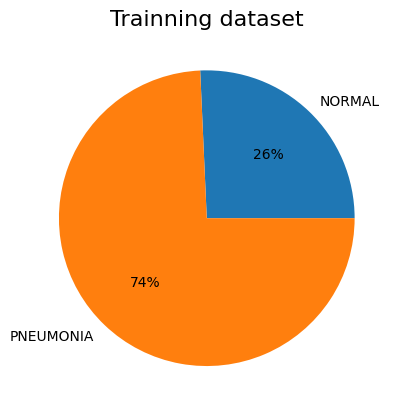

In [8]:
frequency = np.unique(train_generator1.classes, return_counts=True)

plt.title("Trainning dataset", fontsize='16')
plt.pie(frequency[1], labels = class_names, autopct='%1.0f%%');

In [9]:
# Dataset characteristics
print("Dataset Characteristics of Train Data Set:")
print("Number of images:", len(train_generator1.classes))
print("Number of normal images:", len([label for label in train_generator1.classes if label == 0]))
print("Number of pneumonia images:", len([label for label in train_generator1.classes if label == 1]))
print()

print("Dataset Characteristics of Test Data Set:")
print("Number of images:", len(test_generator.classes))
print("Number of normal images:", len([label for label in test_generator.classes if label == 0]))
print("Number of pneumonia images:", len([label for label in test_generator.classes if label == 1]))
print()

# print("Dataset Characteristics of Validation Data Set:")
# print("Number of images:", len(val_generator.classes))
# print("Number of normal images:", len([label for label in val_generator.classes if label == 0]))
# print("Number of pneumonia images:", len([label for label in val_generator.classes if label == 1]))
# print()

Dataset Characteristics of Train Data Set:
Number of images: 5216
Number of normal images: 1341
Number of pneumonia images: 3875

Dataset Characteristics of Test Data Set:
Number of images: 624
Number of normal images: 234
Number of pneumonia images: 390



In [10]:
class_weights = compute_class_weight(class_weight = "balanced", classes= np.unique(train_generator1.classes), y= train_generator1.classes)
class_weights = dict(zip(np.unique(train_generator1.classes), class_weights))
class_weights

{0: 1.9448173005219984, 1: 0.6730322580645162}

Train image data from Data Augmentation 1


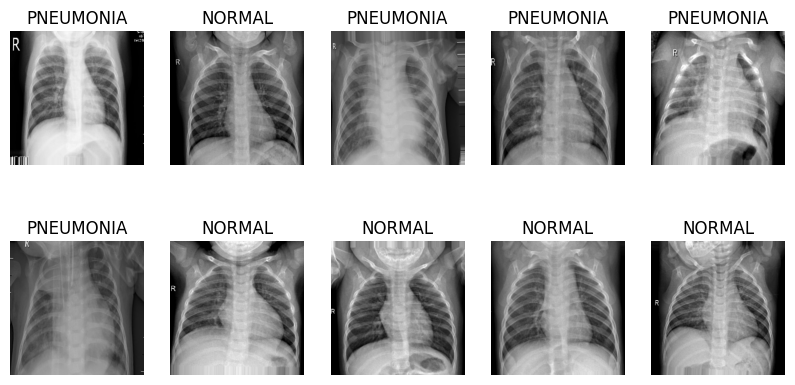

In [11]:
print('Train image data from Data Augmentation 1')
img, label = next(train_generator1)
# print(len(label))

plt.figure(figsize=[10, 5])
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(img[i])
    plt.axis('off')
    plt.title(class_names[np.argmax(label[i])])    
plt.show()
    
# print('Train image data from Data Augmentation 2')
# img, label = next(train_generator2)

# plt.figure(figsize=[10, 4])
# for i in range(10):
#     plt.subplot(2, 5, i+1)
#     plt.imshow(img[i])
#     plt.axis('off')
#     plt.title(class_names[np.argmax(label[i])])       
# plt.show()    

# print('Train image data from Original Image')
# img, label = next(train_generator3)

# plt.figure(figsize=[10, 4])
# for i in range(10):
#     plt.subplot(2, 5, i+1)
#     plt.imshow(img[i])
#     plt.axis('off')
#     plt.title(class_names[np.argmax(label[i])])       
# plt.show()   

In [12]:
# Define the epochs for training 
EPOCHS = 20

# Define the number of GPUs to use
num_gpus = 2

# Merge augmented image data for training
# merged_train_generator = chain(train_generator1, train_generator2, train_generator3)

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_accuracy', patience=2, verbose=1, restore_best_weights=True)

# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.001, patience=10, verbose=1)

# For development purpose, we first limit the train data set to the original image data set
# train_data = merged_train_generator
# train_data = train_generator1
train_data = train_generator1
# train_data = test_generator

In [13]:
import torch

if torch.cuda.is_available():
    print(f"GPU is available: {torch.cuda.get_device_name(0)}")
else:
    print("No GPU found. Check your Kaggle settings.")


GPU is available: Tesla P100-PCIE-16GB


In [14]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Example tensor
x = torch.tensor([1.0, 2.0, 3.0]).to(device)
print(x)


Using device: cuda
tensor([1., 2., 3.], device='cuda:0')


In [15]:
import tensorflow as tf

# Set GPU as the default device
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        tf.config.set_visible_devices(gpus[0], 'GPU')  # Use only the first GPU
        print("Using GPU:", gpus[0])
    except RuntimeError as e:
        print(e)
else:
    print("No GPU found. Check your Kaggle settings.")


Using GPU: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


### VGG16

In [16]:
# Create a MirroredStrategy
strategy = tf.distribute.MirroredStrategy(devices=['/gpu:0', '/gpu:1'])

# Open a strategy scope
with strategy.scope():
    
    # Load the pre-trained VGG16 model without the top classification layer
    base_model_VGG16 = VGG16(weights='imagenet', include_top=False, input_shape=(image_height, image_width, 3))

    # Set the layers of the base model as non-trainable (freeze them)
    for layer in base_model_VGG16.layers:
        layer.trainable = False
    
    # Create a new model and add the VGG16 base model
    model_VGG16 = Sequential()
    model_VGG16.add(base_model_VGG16)

    # Add a fully connected layer and output layer for classification
    model_VGG16.add(GlobalAveragePooling2D())
    model_VGG16.add(Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
    model_VGG16.add(Dropout(0.4))
    model_VGG16.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
    model_VGG16.add(Dropout(0.2))
    model_VGG16.add(Dense(2, activation='softmax'))

    # Model summary
    print("Model Summary (VGG16):")
    model_VGG16.summary()
    print()

    # Compile the model
    model_VGG16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history_VGG16 = model_VGG16.fit(train_data, epochs=EPOCHS, validation_data=test_generator, callbacks=[early_stopping], class_weight=class_weights)

    # Validate the model
    val_loss_VGG16, val_accuracy_VGG16 = model_VGG16.evaluate(test_generator, steps=len(test_generator))
    print(f'Validation Loss: {val_loss_VGG16:.4f}')
    print(f'Validation Accuracy: {val_accuracy_VGG16:.4f}')

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Model Summary (VGG16):


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)


Epoch 1/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 204s 2s/step - accuracy: 0.6226 - loss: 0.8299 - val_accuracy: 0.8173 - val_loss: 0.5270
Epoch 2/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.8657 - loss: 0.4118 - val_accuracy: 0.8526 - val_loss: 0.4327
Epoch 3/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.8896 - loss: 0.3664 - val_accuracy: 0.8269 - val_loss: 0.4605
Epoch 4/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.8981 - loss: 0.3363 - val_accuracy: 0.8526 - val_loss: 0.4263
Epoch 4: early stopping
Restoring model weights from the end of the best epoch: 2.
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 474ms/step - accuracy: 0.8503 - loss: 0.4440
Validation Loss: 0.4147
Validation Accuracy: 0.8526


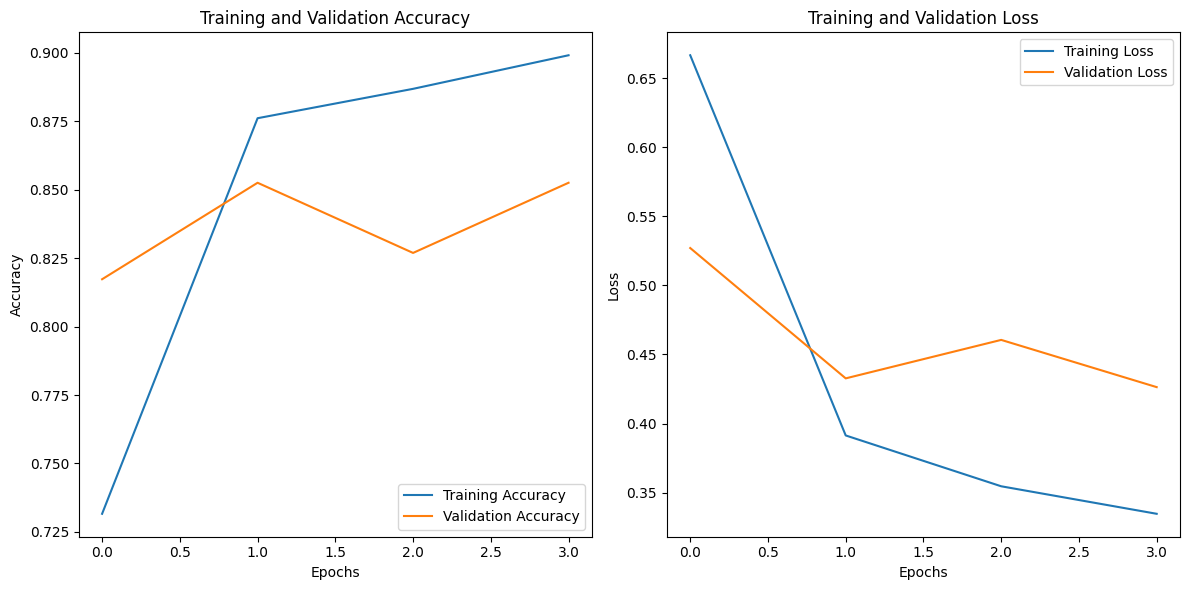

In [17]:
# Plotting training and validation accuracy
plt.figure(figsize=(12, 6))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history_VGG16.history['accuracy'], label='Training Accuracy')
plt.plot(history_VGG16.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history_VGG16.history['loss'], label='Training Loss')
plt.plot(history_VGG16.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

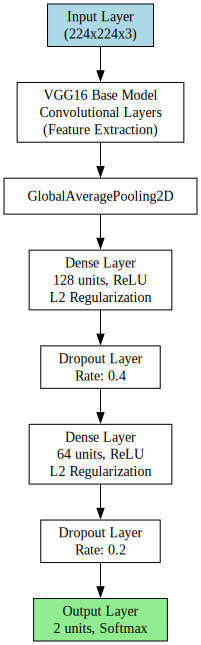

In [18]:
from graphviz import Digraph

# Create a new directed graph
dot = Digraph()

# Define nodes with details about each layer
dot.node('Input', 'Input Layer\n(224x224x3)', shape='box', style='filled', fillcolor='lightblue')
dot.node('Conv1', 'VGG16 Base Model\nConvolutional Layers\n(Feature Extraction)', shape='box')
dot.node('GlobalPooling', 'GlobalAveragePooling2D', shape='box')
dot.node('Dense128', 'Dense Layer\n128 units, ReLU\nL2 Regularization', shape='box')
dot.node('Dropout40', 'Dropout Layer\nRate: 0.4', shape='box')
dot.node('Dense64', 'Dense Layer\n64 units, ReLU\nL2 Regularization', shape='box')
dot.node('Dropout20', 'Dropout Layer\nRate: 0.2', shape='box')
dot.node('Output', 'Output Layer\n2 units, Softmax', shape='box', style='filled', fillcolor='lightgreen')

# Define edges between the nodes
dot.edge('Input', 'Conv1')
dot.edge('Conv1', 'GlobalPooling')
dot.edge('GlobalPooling', 'Dense128')
dot.edge('Dense128', 'Dropout40')
dot.edge('Dropout40', 'Dense64')
dot.edge('Dense64', 'Dropout20')
dot.edge('Dropout20', 'Output')

# Render the graph as a file (e.g., PNG)
dot.render('vgg16_model_flowchart', format='png')

# To display the graph in a notebook (if using Jupyter)
dot

In [19]:
from sklearn.metrics import classification_report
import numpy as np

# After evaluating the model
val_loss_VGG16, val_accuracy_VGG16 = model_VGG16.evaluate(test_generator, steps=len(test_generator))
print(f'Validation Loss: {val_loss_VGG16:.4f}')
print(f'Validation Accuracy: {val_accuracy_VGG16:.4f}')

# Get predictions
Y_pred = model_VGG16.predict(test_generator, steps=len(test_generator))
y_pred = np.argmax(Y_pred, axis=1)

# True labels from the generator
y_true = test_generator.classes

# Get the class indices
class_labels = list(test_generator.class_indices.keys())

# Print classification report (includes precision, recall, f1-score)
report = classification_report(y_true, y_pred, target_names=class_labels)
print(report)


13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 495ms/step - accuracy: 0.8590 - loss: 0.4364
Validation Loss: 0.4246
Validation Accuracy: 0.8782
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 439ms/step
              precision    recall  f1-score   support

      NORMAL       0.32      0.29      0.30       234
   PNEUMONIA       0.60      0.63      0.61       390

    accuracy                           0.50       624
   macro avg       0.46      0.46      0.46       624
weighted avg       0.49      0.50      0.50       624



### Densenet121

In [20]:
# Create a MirroredStrategy
strategy = tf.distribute.MirroredStrategy(devices=['/gpu:0', '/gpu:1'])

# Open a strategy scope
with strategy.scope():
    
    # Load the pre-trained DenseNet121 model without the top classification layer
    base_model_DenseNet = DenseNet121(weights='imagenet', include_top=False, input_shape=(image_height, image_width, 3))

    # Set the layers of the base model as non-trainable (freeze them)
    for layer in base_model_DenseNet.layers:
        layer.trainable = False  
    
    # Create a new model and add the DenseNet121 base model
    model_DenseNet = Sequential()
    model_DenseNet.add(base_model_DenseNet)

    # Add a global average pooling layer and output layer for classification
    model_DenseNet.add(GlobalAveragePooling2D())
    model_DenseNet.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model_DenseNet.add(Dropout(0.4))
    model_DenseNet.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model_DenseNet.add(Dropout(0.2))    
    model_DenseNet.add(Dense(2, activation='softmax'))

    # Model summary
    print("Model Summary (DenseNet121):")
    model_DenseNet.summary()
    print()

    # Compile the model
    model_DenseNet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history_DenseNet = model_DenseNet.fit(train_data, epochs=EPOCHS, validation_data=test_generator, class_weight=class_weights)

    # Validate the model
    val_loss_DenseNet, val_accuracy_DenseNet = model_DenseNet.evaluate(test_generator, steps=len(test_generator))
    print(f'Validation Loss: {val_loss_DenseNet:.4f}')
    print(f'Validation Accuracy: {val_accuracy_DenseNet:.4f}')

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Model Summary (DenseNet121):


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)        │ ?                      │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,037,504 (26.85 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 7,037,504 (26.85 MB)


Epoch 1/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - accuracy: 0.6975 - loss: 0.7949 - val_accuracy: 0.8782 - val_loss: 0.4632
Epoch 2/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.9135 - loss: 0.3505 - val_accuracy: 0.8846 - val_loss: 0.4164
Epoch 3/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 159s 1s/step - accuracy: 0.9184 - loss: 0.3095 - val_accuracy: 0.8814 - val_loss: 0.3908
Epoch 4/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.9339 - loss: 0.2672 - val_accuracy: 0.8942 - val_loss: 0.4071
Epoch 5/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.9395 - loss: 0.2361 - val_accuracy: 0.8397 - val_loss: 0.4784
Epoch 6/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.9389 - loss: 0.2342 - val_accuracy: 0.8750 - val_loss: 0.4256
Epoch 7/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.9469 - loss: 0.2148 - val_accuracy: 0.8846 - val_loss: 0.4175
Epoch 8/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 155s 1s/step - accuracy: 0.9452 - loss: 0.2097 - val_acc

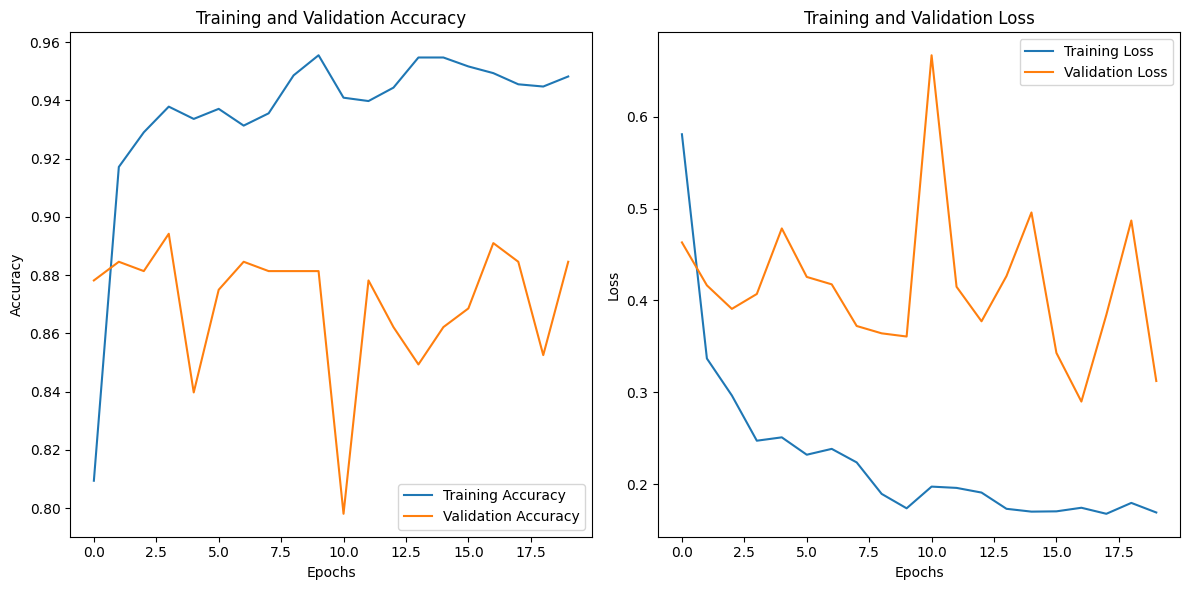

In [21]:
# Plotting training and validation accuracy
plt.figure(figsize=(12, 6))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history_DenseNet.history['accuracy'], label='Training Accuracy')
plt.plot(history_DenseNet.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history_DenseNet.history['loss'], label='Training Loss')
plt.plot(history_DenseNet.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

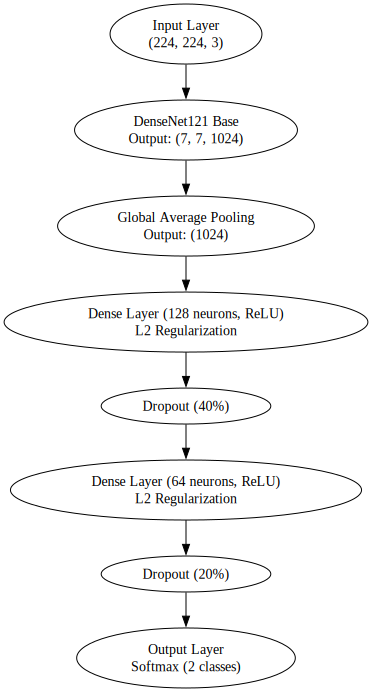

In [22]:
from graphviz import Digraph

# Create a Digraph object
dot = Digraph(comment='DenseNet Model Architecture')

# Adding the layers to the graph (assuming simplified DenseNet121 layers)

# Input layer
dot.node('Input', 'Input Layer\n(224, 224, 3)')

# DenseNet121 base layers
dot.node('DenseNet121', 'DenseNet121 Base\nOutput: (7, 7, 1024)')

# Global Average Pooling layer
dot.node('GlobalAvgPool', 'Global Average Pooling\nOutput: (1024)')

# Fully connected layers
dot.node('Dense_128', 'Dense Layer (128 neurons, ReLU)\nL2 Regularization')
dot.node('Dropout_1', 'Dropout (40%)')
dot.node('Dense_64', 'Dense Layer (64 neurons, ReLU)\nL2 Regularization')
dot.node('Dropout_2', 'Dropout (20%)')

# Output layer
dot.node('Output', 'Output Layer\nSoftmax (2 classes)')

# Defining connections between the layers (use pairs of node names)
dot.edge('Input', 'DenseNet121')
dot.edge('DenseNet121', 'GlobalAvgPool')
dot.edge('GlobalAvgPool', 'Dense_128')
dot.edge('Dense_128', 'Dropout_1')
dot.edge('Dropout_1', 'Dense_64')
dot.edge('Dense_64', 'Dropout_2')
dot.edge('Dropout_2', 'Output')

# Save the flowchart to a file and render it
dot.render('DenseNet_model_flowchart', format='png')  # saves it as 'DenseNet_model_flowchart.png'
dot


In [23]:
from sklearn.metrics import classification_report
import numpy as np

# After evaluating the model
val_loss_DenseNet, val_accuracy_DenseNet = model_DenseNet.evaluate(test_generator, steps=len(test_generator))
print(f'Validation Loss: {val_loss_DenseNet:.4f}')
print(f'Validation Accuracy: {val_accuracy_DenseNet:.4f}')

# Get predictions
Y_pred = model_DenseNet.predict(test_generator, steps=len(test_generator))
y_pred = np.argmax(Y_pred, axis=1)

# True labels from the generator
y_true = test_generator.classes

# Get the class indices
class_labels = list(test_generator.class_indices.keys())

# Print classification report (includes precision, recall, f1-score)
report = classification_report(y_true, y_pred, target_names=class_labels)
print(report)


13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 451ms/step - accuracy: 0.8598 - loss: 0.4015
Validation Loss: 0.3221
Validation Accuracy: 0.8846
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 297ms/step
              precision    recall  f1-score   support

      NORMAL       0.39      0.33      0.36       234
   PNEUMONIA       0.63      0.68      0.66       390

    accuracy                           0.55       624
   macro avg       0.51      0.51      0.51       624
weighted avg       0.54      0.55      0.54       624



### Resnet50

In [24]:
train_directory="/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/"
val_directory="/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/"
test_directory="/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/"

In [25]:
def view_random_image(target_directory, target_class):
    target_folder = target_directory + target_class
    random_image = random.sample(os.listdir(target_folder), 1)
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");
    return img

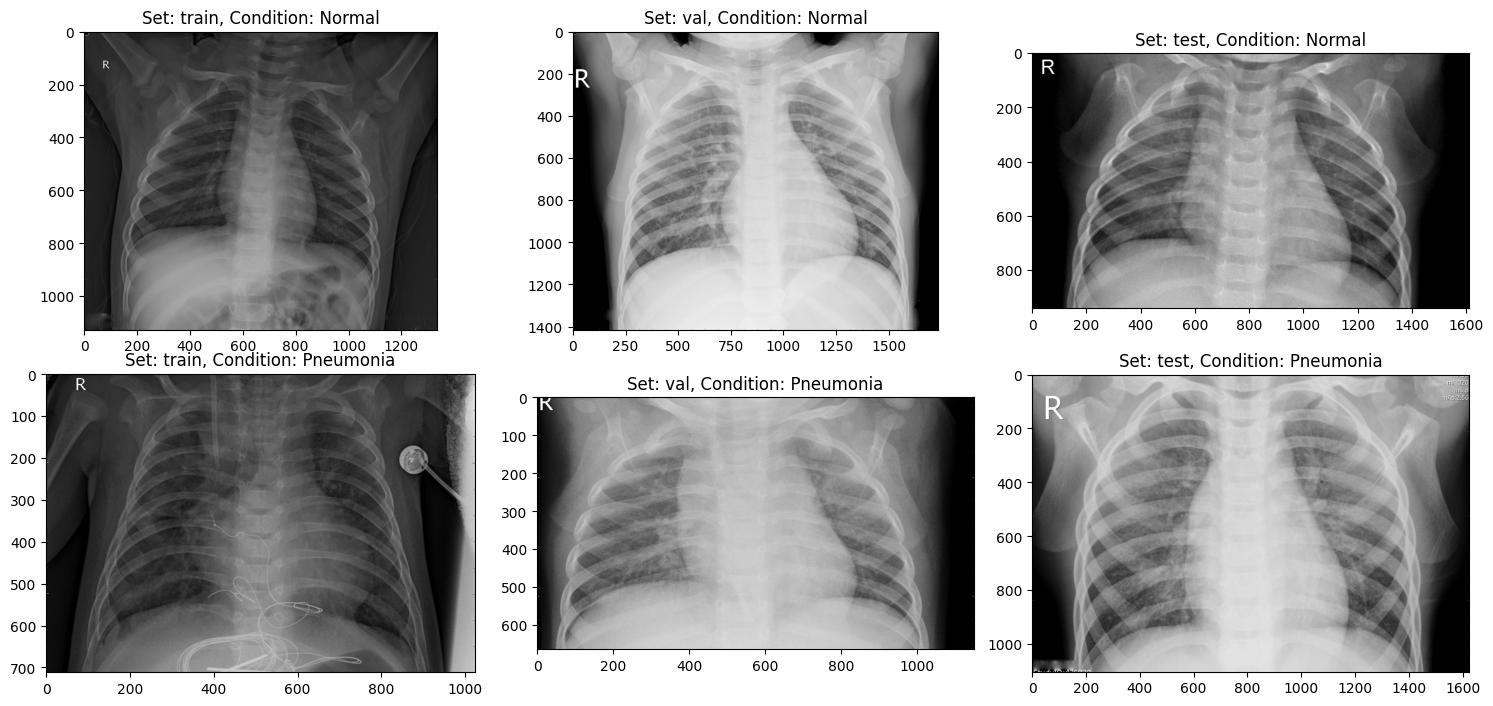

In [26]:
input_path="/kaggle/input/chest-xray-pneumonia/chest_xray/"
fig, ax = plt.subplots(2, 3, figsize=(15, 7))
ax = ax.ravel()
plt.tight_layout()

for i, _set in enumerate(['train', 'val', 'test']):
    set_path = input_path+_set
    ax[i].imshow(plt.imread(set_path+'/NORMAL/'+os.listdir(set_path+'/NORMAL')[0]), cmap='gray')
    ax[i].set_title('Set: {}, Condition: Normal'.format(_set))
    ax[i+3].imshow(plt.imread(set_path+'/PNEUMONIA/'+os.listdir(set_path+'/PNEUMONIA')[0]), cmap='gray')
    ax[i+3].set_title('Set: {}, Condition: Pneumonia'.format(_set))


In [27]:
for _set in ['train', 'val', 'test']:
    n_normal = len(os.listdir(input_path + _set + '/NORMAL'))
    n_infect = len(os.listdir(input_path + _set + '/PNEUMONIA'))
    print('Set: {}, Normal images: {}, pneumonia images: {}'.format(_set, n_normal, n_infect))

Set: train, Normal images: 1341, pneumonia images: 3875
Set: val, Normal images: 8, pneumonia images: 8
Set: test, Normal images: 234, pneumonia images: 390


In [28]:
# Re-sizing the images
IMAGE_SIZE = (224, 224)
# Default batch size
BATCH_SIZE = 32

In [29]:
Image_gen = ImageDataGenerator(
        rescale = 1/255,
        shear_range=10,
        zoom_range=0.3,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.5,2.0],
        width_shift_range = 0.2,
        rotation_range=20,
        fill_mode = 'nearest'
)
val_Datagen = ImageDataGenerator(
        rescale = 1/255
)

In [30]:
train = Image_gen.flow_from_directory(train_directory,
                                       batch_size=32,
                                       class_mode='binary',
                                        target_size=(224,224))

validation = Image_gen.flow_from_directory(val_directory,
                                              batch_size=2,
                                              class_mode='binary',
                                               target_size=(224,224))

test = val_Datagen.flow_from_directory(test_directory,
                                       batch_size=2,
                                       class_mode='binary',
                                        target_size=(224,224))

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [31]:
img, label = next(train)

In [32]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=10)

In [33]:
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                          patience=8)

In [34]:
def create_model():
    resnet_model = tf.keras.applications.ResNet50V2(
        weights='imagenet',
        include_top = False,
        input_shape = (224,224,3)
    )

    for layer in resnet_model.layers:
        layer.trainable=False

    x = resnet_model.output
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(128,activation='relu')(x)
    # output layer
    predictions = tf.keras.layers.Dense(1,activation='sigmoid')(x)

    res_model = tf.keras.Model(inputs=resnet_model.input, outputs=predictions)

    # Compiling the model
    res_model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
    return res_model


In [35]:
res_model = create_model()

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [36]:
res_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_conv[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 56, 56,    │        256 │ pool1_pool[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 56, 56,    │          0 │ conv2_block1_pre… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,096 │ conv2_block1_pre… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_pad  │ (None, 58, 58,    │          0 │ conv2_block1_1_r… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_2_p… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_pre… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_out    │ (None, 56, 56,    │          0 │ conv2_block1_0_c

 Total params: 23,827,201 (90.89 MB)

 Trainable params: 262,401 (1.00 MB)

 Non-trainable params: 23,564,800 (89.89 MB)

In [37]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image, display

plot_model(res_model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)
display(Image(filename='cnn_model.png'))


In [38]:
history = res_model.fit(
    train,
    epochs=EPOCHS, 
    validation_data=validation,
    steps_per_epoch=100,
    callbacks=[early_stopping, lr]
)

Epoch 1/20


I0000 00:00:1742558581.660870     116 service.cc:145] XLA service 0x597a061b7390 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1742558581.660930     116 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  1/100 ━━━━━━━━━━━━━━━━━━━━ 27:54 17s/step - accuracy: 0.5312 - loss: 0.7208

I0000 00:00:1742558586.514980     116 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


100/100 ━━━━━━━━━━━━━━━━━━━━ 101s 849ms/step - accuracy: 0.8091 - loss: 0.4039 - val_accuracy: 0.5625 - val_loss: 1.2899 - learning_rate: 0.0010
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 385ms/step - accuracy: 0.9141 - loss: 0.2139 - val_accuracy: 0.6875 - val_loss: 1.0038 - learning_rate: 0.0010
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 72s 673ms/step - accuracy: 0.8982 - loss: 0.2343 - val_accuracy: 0.5625 - val_loss: 1.3494 - learning_rate: 0.0010
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 35s 349ms/step - accuracy: 0.9220 - loss: 0.1838 - val_accuracy: 0.7500 - val_loss: 0.5693 - learning_rate: 0.0010
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 66s 618ms/step - accuracy: 0.9195 - loss: 0.1900 - val_accuracy: 0.7500 - val_loss: 0.7488 - learning_rate: 0.0010
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 34s 341ms/step - accuracy: 0.9295 - loss: 0.1793 - val_accuracy: 0.8750 - val_loss: 0.4556 - learning_rate: 0.0010
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 65s 607ms/step - accuracy: 0.9262 - loss

Text(0, 0.5, 'Loss')

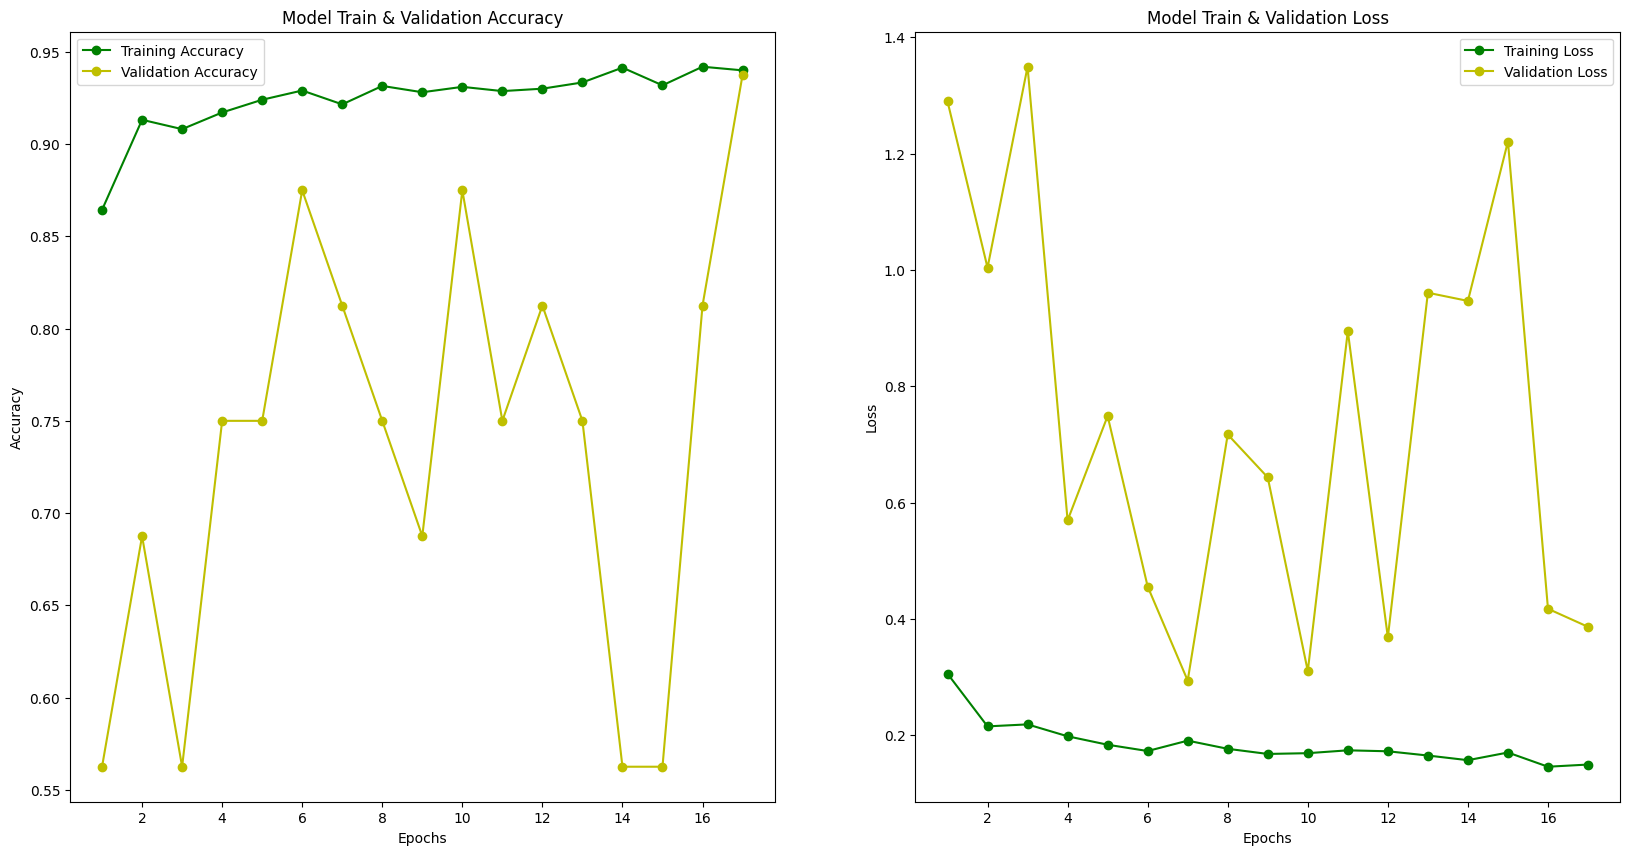

In [39]:
#Plot the training artifacts
fig , ax = plt.subplots(1, 2)
fig.set_size_inches(20, 10)

train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1, len(train_acc) + 1)

ax[0].plot(epochs, train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'yo-' , label = 'Validation Accuracy')
ax[0].set_title('Model Train & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

ax[1].plot(epochs, train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs, val_loss , 'yo-' , label = 'Validation Loss')
ax[1].set_title('Model Train & Validation Loss')
ax[1].legend()
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')



In [40]:
# Evaluating the model on train and test
score = res_model.evaluate(train)

print("Train Loss: ", score[0])
print("Train Accuracy: ", score[1])

score = res_model.evaluate(test)
print("\nTest loss: ", score[0])
print("Test Accuracy: ", score[1])


163/163 ━━━━━━━━━━━━━━━━━━━━ 97s 586ms/step - accuracy: 0.9474 - loss: 0.1402
Train Loss:  0.14004415273666382
Train Accuracy:  0.9442101120948792
312/312 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.9197 - loss: 0.2390

Test loss:  0.23889923095703125
Test Accuracy:  0.9166666865348816


In [44]:
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import img_to_array

def predict_vgg16(model, image_path):
    # Load and preprocess the image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (image_height, image_width))  # Ensure it matches model input size
    img = img_to_array(img) / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Expand dimensions for batch size

    # Make prediction
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)  # Get class index

    # Class labels (modify as per your dataset)
    class_labels = ["Normal", "Pneumonia"]
    print(f"VGG16 Prediction: {class_labels[predicted_class]} (Confidence: {prediction[0][predicted_class]:.2f})")

# Example Usage
predict_vgg16(model_VGG16, "/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person100_bacteria_477.jpeg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
VGG16 Prediction: Pneumonia (Confidence: 0.97)


In [45]:
def predict_densenet(model, image_path):
    # Load and preprocess the image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (image_height, image_width))
    img = img_to_array(img) / 255.0
    img = np.expand_dims(img, axis=0)

    # Make prediction
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)

    class_labels = ["Normal", "Pneumonia"]
    print(f"DenseNet121 Prediction: {class_labels[predicted_class]} (Confidence: {prediction[0][predicted_class]:.2f})")

# Example Usage
predict_densenet(model_DenseNet, "/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person100_bacteria_477.jpeg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
DenseNet121 Prediction: Pneumonia (Confidence: 0.93)


In [46]:
def predict_resnet(model, image_path):
    # Load the image
    img = cv2.imread(image_path)
    
    # Use the correct target size
    img = cv2.resize(img, (224, 224))
    
    # Convert image to array and normalize
    img = img_to_array(img) / 255.0
    img = np.expand_dims(img, axis=0)

    # Make prediction
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)
    
    class_labels = ["Normal", "Pneumonia"]
    print(f"ResNet Prediction: {class_labels[predicted_class]} (Confidence: {prediction[0][predicted_class]:.2f})")

# Example Usage
predict_resnet(res_model, "/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person100_bacteria_477.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
ResNet Prediction: Normal (Confidence: 0.99)
